In [0]:
import tensorflow as tf
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# import dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2020-06-07 12:18:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.37MB/s    in 55s     

2020-06-07 12:19:36 (5.60 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# ekstrasi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [26]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [0]:
# proses augmentasi gambar
datagen = ImageDataGenerator(
    validation_split=0.3,
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
)

In [44]:
# mempersiapkan data latih
train_generator = datagen.flow_from_directory(
    directory = base_dir, # direktori data latih
    target_size = (100, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    subset='training',
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    directory = base_dir, # direktori data validasi
    target_size = (100, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    subset='validation',
    class_mode='binary'
)  

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [0]:
# membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [0]:
# mencompile dan menentukan loss function serta optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [47]:
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=50,
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/50
25/25 - 4s - loss: 1.1479 - accuracy: 0.3500 - val_loss: 1.1106 - val_accuracy: 0.2500
Epoch 2/50
25/25 - 4s - loss: 1.1199 - accuracy: 0.3600 - val_loss: 1.0799 - val_accuracy: 0.6000
Epoch 3/50
25/25 - 4s - loss: 1.1021 - accuracy: 0.3300 - val_loss: 1.0928 - val_accuracy: 0.4500
Epoch 4/50
25/25 - 4s - loss: 1.0922 - accuracy: 0.3600 - val_loss: 1.0903 - val_accuracy: 0.4000
Epoch 5/50
25/25 - 4s - loss: 1.0430 - accuracy: 0.4200 - val_loss: 0.9413 - val_accuracy: 0.6500
Epoch 6/50
25/25 - 4s - loss: 0.8596 - accuracy: 0.6300 - val_loss: 0.7383 - val_accuracy: 0.7500
Epoch 7/50
25/25 - 4s - loss: 0.6175 - accuracy: 0.7700 - val_loss: 0.7389 - val_accuracy: 0.6000
Epoch 8/50
25/25 - 4s - loss: 0.5925 - accuracy: 0.7500 - val_loss: 0.5243 - val_accuracy: 0.8500
Epoch 9/50
25/25 - 4s - loss: 0.3877 - accuracy: 0.8400 - val_loss: 0.4489 - val_accuracy: 0.8500
Epoch 10/50
25/25 - 4s - loss: 0.5325 - accuracy: 0.8300 - val_loss: 0.3974 - val_accuracy: 0.9000
Epoch 11/50
25/25 -

Saving 2EeIeEe1P0a0Fi9v.png to 2EeIeEe1P0a0Fi9v (1).png
Scissors


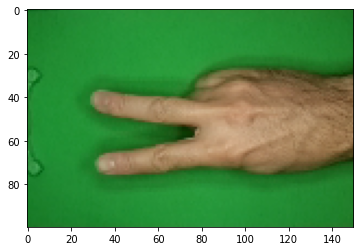

In [49]:
#prediksi gambar

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict = np.argmax(classes)
  
  if predict==2:
    print('Scissors')
  elif predict==1:
    print('Rock')
  elif predict==0:
    print('Paper')